In [45]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from LogisticRegression import LogisticRegression
from MultilayerPerceptron import MultilayerPerceptron
from plot_confusion_matrix import plot_confusion_matrix
from DecisionTree import DecisionTree
metrics = DecisionTree()

In [46]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=41)

In [4]:
LR_Model = LogisticRegression(learning_rate=0.0001, num_iterations=1000)
LR_Model.fit(X_train, y_train)
y_pred_lr = LR_Model.predict(X_test)

logistic_regression_confusuion_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
print(f"Confusion matrix: \n{logistic_regression_confusuion_matrix}")
accuracy, precision, recall, f1 = metrics.metrics(logistic_regression_confusuion_matrix)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Confusion matrix: 
[[21 34]
 [11 88]]
Accuracy: 0.7077922077922078
Precision: 0.65625
Recall: 0.38181818181818183
F1: 0.48275862068965525


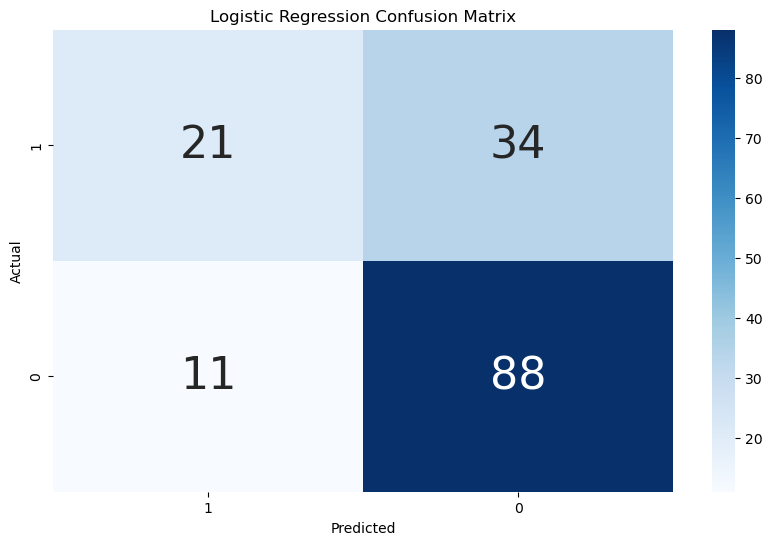

In [5]:
plot_confusion_matrix(logistic_regression_confusuion_matrix, title='Logistic Regression Confusion Matrix')

In [48]:
X_train_tensor = torch.from_numpy(X_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.from_numpy(y_train).long()
y_test_tensor = torch.from_numpy(y_test).long()

Epoch 0, Training Loss: 10.875563621520996 - Training Accuracy: 0.653094470500946
Epoch 100, Training Loss: 0.5630934238433838 - Training Accuracy: 0.7166123986244202
Epoch 200, Training Loss: 0.5125468373298645 - Training Accuracy: 0.757328987121582
Epoch 300, Training Loss: 0.4851604998111725 - Training Accuracy: 0.7736156582832336
Epoch 400, Training Loss: 0.46867623925209045 - Training Accuracy: 0.7736156582832336
Epoch 500, Training Loss: 0.4607497751712799 - Training Accuracy: 0.7719869613647461
Epoch 600, Training Loss: 0.46252328157424927 - Training Accuracy: 0.7801302671432495
Epoch 700, Training Loss: 0.4645177125930786 - Training Accuracy: 0.7833876013755798
Epoch 800, Training Loss: 0.44277483224868774 - Training Accuracy: 0.7833876013755798
Epoch 900, Training Loss: 0.4489612281322479 - Training Accuracy: 0.7850162982940674


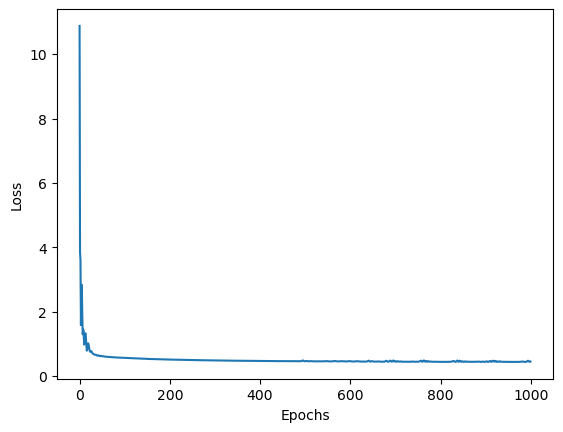

In [60]:
mlp = MultilayerPerceptron(input_size=X_train_tensor.shape[1], 
                           hidden_size=X_train_tensor.shape[1]*2, 
                           output_size=2, 
                           learning_rate=0.03,
                           activation="relu",
                           optimizer="adam",)
mlp.fit(X_train_tensor, y_train_tensor, epochs=1000)

In [61]:
y_pred_mlp = mlp.predict(X_test_tensor)
y_pred_mlp = torch.argmax(y_pred_mlp, dim=1)

mlp_confusion_matrix = metrics.confusion_matrix(y_test_tensor, y_pred_mlp)
print(f"Confusion matrix: \n{mlp_confusion_matrix}")
accuracy, precision, recall, f1 = metrics.metrics(mlp_confusion_matrix)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Confusion matrix: 
[[38 17]
 [13 86]]
Accuracy: 0.8051948051948052
Precision: 0.7450980392156863
Recall: 0.6909090909090909
F1: 0.7169811320754716


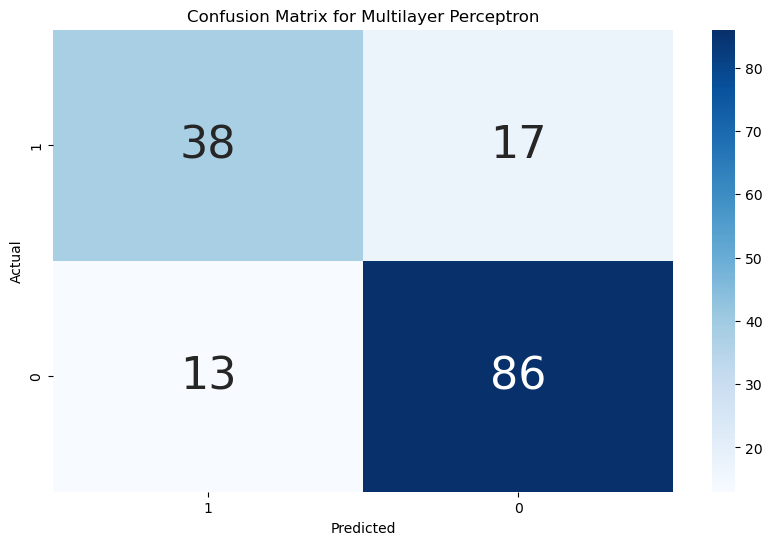

In [62]:
plot_confusion_matrix(mlp_confusion_matrix, "Confusion Matrix for Multilayer Perceptron")